In [1]:
import os
import sys
import pandas as pd
from dotenv import load_dotenv
import requests

# Add project root to path to allow importing from src
# The notebook is in notebooks/, so we go one level up
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added {project_root} to path")

from src.data_utils import fetch_data_from_api # We still use this for the request logic

# Load environment variables (for DUNE_API_KEY)
# Make sure you have a .env file in the root of the project with:
# DUNE_API_KEY="your_dune_api_key_here"
load_dotenv(os.path.join(project_root, '.env'))

DUNE_API_KEY = os.getenv("DUNE_API_KEY")

if not DUNE_API_KEY or DUNE_API_KEY == "your_dune_api_key_here":
    print("⚠️ Dune API Key not found or is a placeholder.")
    print("Please create a .env file with your Dune API key.")
else:
    print("✅ Dune API Key loaded successfully.")

# --- Load Ethereum Datasets ---

# 1. Geo and Provider Data for Ethereum Validators
geo_provider_url = "https://api.dune.com/api/v1/query/5332515/results"

# 2. Distribution of Validators Across Entities
entities_url = "https://api.dune.com/api/v1/query/5164353/results"

# Common headers for Dune API
headers = {
    "X-Dune-API-Key": DUNE_API_KEY
}

# --- Fetch and Process Data ---
print("\\nFetching and processing Ethereum datasets from Dune API...")

# Fetch Geo/Provider Data
geo_response = requests.get(geo_provider_url, headers=headers)
geo_response.raise_for_status()
geo_data = geo_response.json()
eth_geo_provider_df = pd.DataFrame(geo_data['result']['rows'])
print(f"✅ Loaded {len(eth_geo_provider_df)} rows for Geo/Provider data.")


# Fetch Entities Data
entities_response = requests.get(entities_url, headers=headers)
entities_response.raise_for_status()
entities_data = entities_response.json()
eth_entities_df = pd.DataFrame(entities_data['result']['rows'])
print(f"✅ Loaded {len(eth_entities_df)} rows for Entity Distribution data.")


# Display the dataframes
if not eth_geo_provider_df.empty:
    print("\\n--- Ethereum Validator Geo & Provider Data ---")
    display(eth_geo_provider_df.head())

if not eth_entities_df.empty:
    print("\\n--- Ethereum Validator Entity Distribution ---")
    display(eth_entities_df.head())


Added /Users/bernat/Code/firstset/data/decentralization_comps to path
✅ Dune API Key loaded successfully.
\nFetching and processing Ethereum datasets from Dune API...
✅ Loaded 3047 rows for Geo/Provider data.
✅ Loaded 309 rows for Entity Distribution data.
\n--- Ethereum Validator Geo & Provider Data ---


,asn,asn_organization,city,country,region,validators
0,AS8821,WWZ Telekom AG,Unterägeri,CH,Zug,5
1,AS1136,KPN B.V.,Hilversum,NL,North Holland,16
2,AS8758,Iway AG,Zürich,CH,Zurich,37
3,AS7015,"Comcast Cable Communications, LLC",Hanson,US,Massachusetts,2
4,AS7922,"Comcast Cable Communications, LLC",Clinton Township,US,Michigan,4


\n--- Ethereum Validator Entity Distribution ---


,eth_deposited,name,share
0,9017568,Lido,25.670426
1,4206752,Coinbase,11.975415
2,2768448,Binance,7.880976
3,2320760,Ether.fi(EigenLayer),6.606537
4,1545868,Unidentified,4.400642


In [2]:
# --- Load Solana Dataset ---
import os
import pandas as pd
import requests

# Load the API key from the .env file
VALIDATORS_API_KEY = os.getenv("VALIDATORS_API_KEY")

if not VALIDATORS_API_KEY or VALIDATORS_API_KEY == "your_validators_app_api_key":
    print("⚠️ Validators.app API Key not found or is a placeholder.")
    print("Please add VALIDATORS_API_KEY to your .env file.")
else:
    print("✅ Validators.app API Key loaded successfully.")

# Define the API endpoint and headers
solana_url = "https://www.validators.app/api/v1/validators/mainnet.json"
solana_headers = {
    "Token": VALIDATORS_API_KEY
}

# Fetch the data
print("\\nFetching Solana validator data from validators.app API...")
solana_response = requests.get(solana_url, headers=solana_headers)
solana_response.raise_for_status()
solana_data = solana_response.json()

# The response is a list of dictionaries, which is perfect for a DataFrame
solana_validators_df = pd.DataFrame(solana_data)
print(f"✅ Loaded {len(solana_validators_df)} rows for Solana validator data.")

# Display the dataframe
if not solana_validators_df.empty:
    print("\\n--- Solana Validator Data ---")
    display(solana_validators_df.head())


✅ Validators.app API Key loaded successfully.
\nFetching Solana validator data from validators.app API...
✅ Loaded 1089 rows for Solana validator data.
\n--- Solana Validator Data ---


,network,account,name,keybase_id,www_url,details,avatar_url,created_at,updated_at,admin_warning,...,latitude,longitude,data_center_host,vote_account,epoch_credits,epoch,skipped_slots,skipped_slot_percent,ping_time,url
0,mainnet,TiMxX1yasS4CiGyRcnn7sy9T2fvaNdFpkf8tFDhhDkG,Lucky Stake,luckystake,http://luckystake.xyz,Better stake than sorry,https://s3.amazonaws.com/keybase_processed_upl...,2023-01-12 00:05:11 UTC,2025-06-14 03:45:05 UTC,None,...,51.9281,4.422,None,Luck3DN3HhkV6oc7rPQ1hYGgU3b5AhdKW9o1ob6AyU9,4636896.0,807.0,0.0,0.0,NaN,https://www.validators.app/api/v1/validators/m...
1,mainnet,Cu9Ls6dsTL6cxFHZdStHwVSh1uy2ynXz8qPJMS5FRq86,Stardust Staking - 0% fee forever + MEV 0% fee,,https://starduststaking.com,"Stardust Staking is a low fee, reputable and t...",https://starduststaking.com/stardust_logo-4.png,2021-01-30 15:16:16 UTC,2025-01-26 03:40:05 UTC,None,...,48.157,17.0915,None,5iJDEVRi1nMLwKAWhYbEokZnvBAe15rgFaHGkggVEP9z,4639467.0,807.0,0.0,0.0,NaN,https://www.validators.app/api/v1/validators/m...
2,mainnet,juigBT2qetpYpf1iwgjaiWTjryKkY3uUTVAnRFKkqY6,ProStaking,,https://prostaking.com,Pro Staking for Pro Stakers | formerly Juicy S...,https://tinyurl.com/prostaking-ico,2022-06-20 18:30:06 UTC,2025-06-04 03:45:05 UTC,None,...,30.4485,-91.13,None,juicQdAnksqZ5Yb8NQwCLjLWhykvXGktxnQCDvMe6Nx,4637054.0,807.0,0.0,0.0,NaN,https://www.validators.app/api/v1/validators/m...
3,mainnet,mint13XHZSSxtgHuTSM9qPDEJSbWktpmpM4CZxeLB8f,Hanabi Staking 🎆 | Staking Champions,,https://hanabi.so/staking-champions,Independent validator since July 2022. Join th...,https://hanabi.so/logo_new.png,2022-07-30 08:23:30 UTC,2025-05-17 03:40:05 UTC,None,...,59.9056,10.7494,None,mintrNtxN3PhAB45Pt41XqyKghTTpqcoBkQTZqh96iR,4636530.0,807.0,0.0,0.0,NaN,https://www.validators.app/api/v1/validators/m...
4,mainnet,LA1NEzryoih6CQW3gwQqJQffK2mKgnXcjSQZSRpM3wc,Laine ❤️ stakewiz.com,laine_sa,https://stake.laine.one,We are a professional high-performance validat...,https://laine.one/images/ci/icon.png,2022-05-22 15:18:16 UTC,2025-05-17 03:40:05 UTC,None,...,52.3759,4.8975,None,GE6atKoWiQ2pt3zL7N13pjNHjdLVys8LinG8qeJLcAiL,4637057.0,807.0,0.0,0.0,NaN,https://www.validators.app/api/v1/validators/m...


In [3]:
import pandas as pd
from tqdm.auto import tqdm
import requests
import os

# Ensure the solana_validators_df exists and is not empty
if 'solana_validators_df' in locals() and not solana_validators_df.empty:
    # Load IPINFO_KEY from .env
    IPINFO_KEY = os.getenv("IPINFO_KEY")
    if not IPINFO_KEY or IPINFO_KEY == "your_ipinfo_key_here":
        print("⚠️ Ipinfo API Key not found or is a placeholder. Please add IPINFO_KEY to your .env file.")
    else:
        print("✅ Ipinfo API Key loaded successfully.")

        print("Step 1: Parsing 'data_center_key' into ASN, Country, and City...")
        # Split the 'data_center_key' column. The .str accessor handles NaNs gracefully.
        dc_parts = solana_validators_df['data_center_key'].str.split('-', n=2, expand=True)
        
        # Assign the new columns
        solana_validators_df['asn'] = pd.to_numeric(dc_parts[0], errors='coerce')
        solana_validators_df['country'] = dc_parts[1]
        solana_validators_df['city'] = dc_parts[2]
        
        print("✅ Created 'asn', 'country', and 'city' columns.")
        
        # --- Optimized IP to Provider Resolution ---
        print("\\nStep 2: Resolving provider for each unique ASN using Ipinfo API. This is much faster!")

        def get_provider_from_ip(ip):
            """
            Resolves an IP address to a provider name (organization) using the ipinfo.io API.
            """
            if pd.isnull(ip):
                return None
            try:
                url = f"https://ipinfo.io/{ip}/json?token={IPINFO_KEY}"
                response = requests.get(url, timeout=5)
                response.raise_for_status()
                data = response.json()
                return data.get('org')
            except requests.RequestException:
                return None # Handle timeouts, private IPs, etc.
            except Exception:
                return None
                
        # 1. Get the first valid IP for each unique ASN
        # This reduces thousands of lookups to just a few hundred
        asn_ip_map = solana_validators_df.dropna(subset=['asn', 'ip']).groupby('asn')['ip'].first()
        print(f"Found {len(asn_ip_map)} unique ASNs to look up.")

        # 2. Look up the provider for each unique ASN's IP
        asn_to_provider_map = {}
        for asn, ip in tqdm(asn_ip_map.items(), desc="Resolving ASNs"):
            asn_to_provider_map[asn] = get_provider_from_ip(ip)

        # 3. Map the provider back to the main DataFrame based on ASN
        solana_validators_df['provider'] = solana_validators_df['asn'].map(asn_to_provider_map)
        
        print("\\n✅ IP resolution complete.")
        print("Displaying DataFrame with new ASN, Country, City, and Provider columns:")
        
        # Display the relevant columns for verification
        display(solana_validators_df[['name', 'ip', 'asn', 'country', 'city', 'provider']].head())
else:
    print("⚠️ Solana validators DataFrame ('solana_validators_df') not found or is empty. Please run the previous cells first.")


✅ Ipinfo API Key loaded successfully.
Step 1: Parsing 'data_center_key' into ASN, Country, and City...
✅ Created 'asn', 'country', and 'city' columns.
\nStep 2: Resolving provider for each unique ASN using Ipinfo API. This is much faster!
Found 112 unique ASNs to look up.


Resolving ASNs: 0it [00:00, ?it/s]

\n✅ IP resolution complete.
Displaying DataFrame with new ASN, Country, City, and Provider columns:


,name,ip,asn,country,city,provider
0,Lucky Stake,31.204.159.157,49544.0,NL,Rotterdam,AS49544 i3D.net B.V
1,Stardust Staking - 0% fee forever + MEV 0% fee,46.229.232.134,29405.0,SK,Bratislava,AS29405 VNET a.s.
2,ProStaking,69.2.42.124,20355.0,US,Baton Rouge,AS20355 REV
3,Hanabi Staking 🎆 | Staking Champions,91.189.180.78,34989.0,NO,Oslo,AS34989 ServeTheWorld AS
4,Laine ❤️ stakewiz.com,202.8.8.186,20326.0,NL,Amsterdam,AS20326 TeraSwitch Networks Inc.


In [4]:
# --- Merge Solana Entity Names for Analysis ---
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'name' in solana_validators_df.columns:
    name_map = {
        'Kiln1': 'Kiln',
        'Kiln2': 'Kiln',
        'Coinbase 02': 'Coinbase',
        'Coinbase 03': 'Coinbase',
        'Coinbase 04': 'Coinbase',
        'Staking Facilities | MEV 🔥': 'Staking Facilities',
    }
    solana_validators_df['name'] = solana_validators_df['name'].replace(name_map)
    print("✅ Merged Kiln1/Kiln2 into Kiln and all Coinbase variants into Coinbase in Solana dataset.")
else:
    print("⚠️ 'solana_validators_df' not found or is empty, or 'name' column missing.")

✅ Merged Kiln1/Kiln2 into Kiln and all Coinbase variants into Coinbase in Solana dataset.


In [5]:
import requests
import pandas as pd

# Sui JSON-RPC endpoint and payload
sui_rpc_url = "https://fullnode.mainnet.sui.io/"
payload = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "suix_getLatestSuiSystemState",
    "params": []
}

print("Fetching Sui validator data from the Sui mainnet fullnode...")
try:
    response = requests.post(sui_rpc_url, json=payload, timeout=20)
    response.raise_for_status()
    data = response.json()
    validators = data['result']['activeValidators']
    sui_validators_df = pd.DataFrame(validators)
    print(f"✅ Loaded {len(sui_validators_df)} Sui validators.")
    display(sui_validators_df.head())
except Exception as e:
    print(f"❌ Failed to fetch or parse Sui validator data: {e}")


Fetching Sui validator data from the Sui mainnet fullnode...
✅ Loaded 116 Sui validators.


,suiAddress,protocolPubkeyBytes,networkPubkeyBytes,workerPubkeyBytes,proofOfPossessionBytes,name,description,imageUrl,projectUrl,netAddress,...,stakingPoolActivationEpoch,stakingPoolDeactivationEpoch,stakingPoolSuiBalance,rewardsPool,poolTokenBalance,pendingStake,pendingTotalSuiWithdraw,pendingPoolTokenWithdraw,exchangeRatesId,exchangeRatesSize
0,0x8f8ea04f3b751533db8b8da0a40eba1ca8332a92680f...,gNhkGDfc1QPTb/j50fzMPmQVp8PCrSZlxd/b0Ec8nqf1N2...,MoHiJfYzs1i8+P6LYAXN/aO4CdjlpEptsuumFuLL9EM=,oud9N1OOviX9yE3RJ2PqWyERYwGvUNaXC7aBhDRVeT4=,r7Kql1UwLivuv7AATUnZ2VejCWc21AoV+elG3gJU8U6aUa...,InfStones,InfStones runs an enterprise-grade node manage...,https://github.com/sili-infstones/infstones-lo...,https://infstones.com,/dns/prod.sui.infstones.io/tcp/8080/http,...,0,None,19871778234934343,529565325449308,18535654131558006,0,0,0,0xfc84a891514f2eb7f098457bf6451cb36886332116ca...,801
1,0xdead0072f3a00a250cc8dd90315e92822130258105a4...,gPppt5z5zAin3D6xRm5BwoyzMmJFLacVDO7n8KI4NzUXtA...,0h4PSnhtdAwXdVn/Aqy4oTbOuMdYSaYKUaV2YiyzZcY=,GpHKGfFr7uFIWn6apFrwSAtrRWDGoNSLEiROXPdnMW0=,i8EeoRPh4sQC9ZToDBWhknFRuq0EuUyYwwIHq5qc0QTOHF...,Obelisk,Operational Excellence on Bare Metal,,https://obelisk.sh/about/,/dns/sui.wizardfiction.com/tcp/8080/http,...,0,None,35039039090697605,2152430656579716,32674531273421112,0,0,0,0xf74bc9c64fb2efe89027b3e075166e582b5e27030b81...,801
2,0xf4da1d0d8eba4aed89542daa6d720fed039012f36a2e...,gRK+r0Uf/hp3sQgfkkdkN6hqx6ABrc6PZEhPJVnfMpVFp5...,ewoX/i09feuD1mj7l7Aza/+5QQh8srzOQryLb0DXPlE=,0qFqlIdq+IkThJRldEA/7uDHunS8ThBFEQOL1rwQ/Mk=,inOkVeDVPsisJExXSqAN5ZbElsoVHoCCRwdWIt2+U0ccIX...,Astro-Stakers,Secure staking validator service for the crypt...,https://s3.amazonaws.com/keybase_processed_upl...,https://twitter.com/astrostakers,/dns/sui-main.astrostakers.com/tcp/8080/http,...,0,None,37948499727425854,2506078313206000,35351487601169388,0,203434911051,189512807814,0x5a98c5bb1087247cf3a5a256c9e996f424d15614b780...,801
3,0x4ce8d9d329879f3b361c9515f48acc0f91b283a7305f...,gYiKa0xo+PSd4JbZjy0/dsMPVLjgYVQ17VqQhRc69+TcMy...,S2v0h4cFjA8+fzDk9UAP/QDX5kp2DVtJkENwOSIx3wI=,k/nGPbdVAOBWWd31HdWDWeaKEPX6T0Ux7wNZpvZktNI=,kfS4YNH0d6EpZEN/t99NP86mM6QFqfx9zJ+TcpMCQYbOcS...,H2O Nodes,On Prem Nodes from Austria,https://framerusercontent.com/images/7Zz5Y0ZD7...,https://h2o-nodes.com,/dns/sui-mainnet.h2o-nodes.com/tcp/8080/http,...,0,None,38341244990814812,1943943477466485,35752980309074438,0,0,0,0xd5ca1d27a5ddea4a15403c146fa7eabd246367ca796e...,801
4,0x633344069731c08d06212beb1c2fd2f9d87e53295335...,gm/dw5PAZkeVxUTD0v0wmRkvoeoBfJXx2a2boVhBBBu6P4...,TSTIhOA47/7AfAAPn8hiboqYnDV/Y6gwYCd6BqdU1I8=,Ai/nS6ON5iFZW2aUf3ehz40JAFZtZC+nTl4CmQb0THA=,qA4QJ6ytPjPKFZworZUuJuF8gFCUtb7vfz9+oPr/+baFCz...,A41,a41 is a blockchain infrastructure company. We...,https://s3.ap-northeast-2.amazonaws.com/a41.io...,https://a41.io,/dns/validator.sui.a41.io/tcp/8080/http,...,0,None,28798460441987110,1935117758656242,26854112555508369,0,0,0,0xddaf2ca54dba305fd44eb95be934153136ec6df505b9...,801


In [6]:
import socket
import re
from tqdm.auto import tqdm
import os
import requests

# Load IPINFO_KEY from .env
IPINFO_KEY = os.getenv("IPINFO_KEY")
if not IPINFO_KEY or IPINFO_KEY == "your_ipinfo_key_here":
    print("⚠️ Ipinfo API Key not found or is a placeholder. Please add IPINFO_KEY to your .env file.")
else:
    print("✅ Ipinfo API Key loaded successfully.")

    def extract_hostname(address):
        if pd.isnull(address):
            return None
        match = re.search(r'/dns/([^/]+)', address)
        if match:
            return match.group(1)
        return None

    def resolve_hostname_to_ip(hostname):
        try:
            return socket.gethostbyname(hostname)
        except Exception:
            return None

    def get_ipinfo(ip):
        if not ip:
            return {}
        try:
            url = f"https://ipinfo.io/{ip}/json?token={IPINFO_KEY}"
            resp = requests.get(url, timeout=5)
            resp.raise_for_status()
            return resp.json()
        except Exception:
            return {}

    if 'sui_validators_df' in locals() and not sui_validators_df.empty:
        print("Resolving hostnames and enriching Sui validator data...")
        # Extract hostname from p2pAddress
        sui_validators_df['hostname'] = sui_validators_df['p2pAddress'].apply(extract_hostname)
        # Resolve hostname to IP using tqdm for progress
        hostnames = sui_validators_df['hostname']
        ips = []
        for h in tqdm(hostnames, desc='Resolving hostnames to IPs'):
            ips.append(resolve_hostname_to_ip(h))
        sui_validators_df['ip'] = ips
        # Get Ipinfo data for each unique IP
        ip_to_info = {}
        for ip in tqdm(sui_validators_df['ip'].dropna().unique(), desc="Ipinfo lookups"):
            ip_to_info[ip] = get_ipinfo(ip)
        # Map Ipinfo data back to the DataFrame
        sui_validators_df['provider'] = sui_validators_df['ip'].map(lambda ip: ip_to_info.get(ip, {}).get('org'))
        sui_validators_df['asn'] = sui_validators_df['ip'].map(lambda ip: ip_to_info.get(ip, {}).get('org', '').split(' ')[0] if 'org' in ip_to_info.get(ip, {}) else None)
        sui_validators_df['country'] = sui_validators_df['ip'].map(lambda ip: ip_to_info.get(ip, {}).get('country'))
        sui_validators_df['city'] = sui_validators_df['ip'].map(lambda ip: ip_to_info.get(ip, {}).get('city'))
        print("\n✅ Sui validator data enriched with IP, provider, ASN, country, and city.")
        display(sui_validators_df[['name', 'hostname', 'ip', 'provider', 'asn', 'country', 'city']].head())
    else:
        print("⚠️ Sui validators DataFrame ('sui_validators_df') not found or is empty. Please run the previous cell first.")


✅ Ipinfo API Key loaded successfully.
Resolving hostnames and enriching Sui validator data...


Resolving hostnames to IPs:   0%|          | 0/116 [00:00<?, ?it/s]

Ipinfo lookups:   0%|          | 0/115 [00:00<?, ?it/s]


✅ Sui validator data enriched with IP, provider, ASN, country, and city.


,name,hostname,ip,provider,asn,country,city
0,InfStones,prod.sui.infstones.io,69.67.150.119,AS262287 Latitude.sh LTDA,AS262287,US,Miami
1,Obelisk,sui.wizardfiction.com,45.250.253.97,AS396356 Latitude.sh,AS396356,US,New York City
2,Astro-Stakers,sui-main.astrostakers.com,45.32.177.0,"AS20473 The Constant Company, LLC",AS20473,GB,London
3,H2O Nodes,sui-mainnet.h2o-nodes.com,185.219.100.82,AS58010 uvensys GmbH,AS58010,DE,Frankfurt am Main
4,A41,validator.sui.a41.io,164.132.247.228,AS16276 OVH SAS,AS16276,FR,Lille


In [7]:
import re

# Helper for special ASN rules
def clean_provider(asn, name):
    if asn == '262287':
        return 'Latitude.sh'
    if asn in ['205544', '28753']:
        return 'Leaseweb'
    return name

# Normalize provider info for Solana
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'provider' in solana_validators_df.columns:
    def split_provider(provider):
        if pd.isnull(provider):
            return (None, None)
        match = re.match(r"AS(\d+) (.+)", str(provider))
        if match:
            asn, name = match.group(1), match.group(2)
            name = clean_provider(asn, name)
            return asn, name
        return (None, provider)
    solana_validators_df[['asn_number', 'provider_name']] = solana_validators_df['provider'].apply(lambda x: pd.Series(split_provider(x)))
    print("✅ Solana: Split 'provider' into 'asn_number' and 'provider_name' with special rules.")
else:
    print("⚠️ 'solana_validators_df' not found or is empty, or 'provider' column missing.")

# Normalize provider info for Sui
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'provider' in sui_validators_df.columns:
    def split_provider(provider):
        if pd.isnull(provider):
            return (None, None)
        match = re.match(r"AS(\d+) (.+)", str(provider))
        if match:
            asn, name = match.group(1), match.group(2)
            name = clean_provider(asn, name)
            return asn, name
        return (None, provider)
    sui_validators_df[['asn_number', 'provider_name']] = sui_validators_df['provider'].apply(lambda x: pd.Series(split_provider(x)))
    print("✅ Sui: Split 'provider' into 'asn_number' and 'provider_name' with special rules.")
else:
    print("⚠️ 'sui_validators_df' not found or is empty, or 'provider' column missing.")


✅ Solana: Split 'provider' into 'asn_number' and 'provider_name' with special rules.
✅ Sui: Split 'provider' into 'asn_number' and 'provider_name' with special rules.


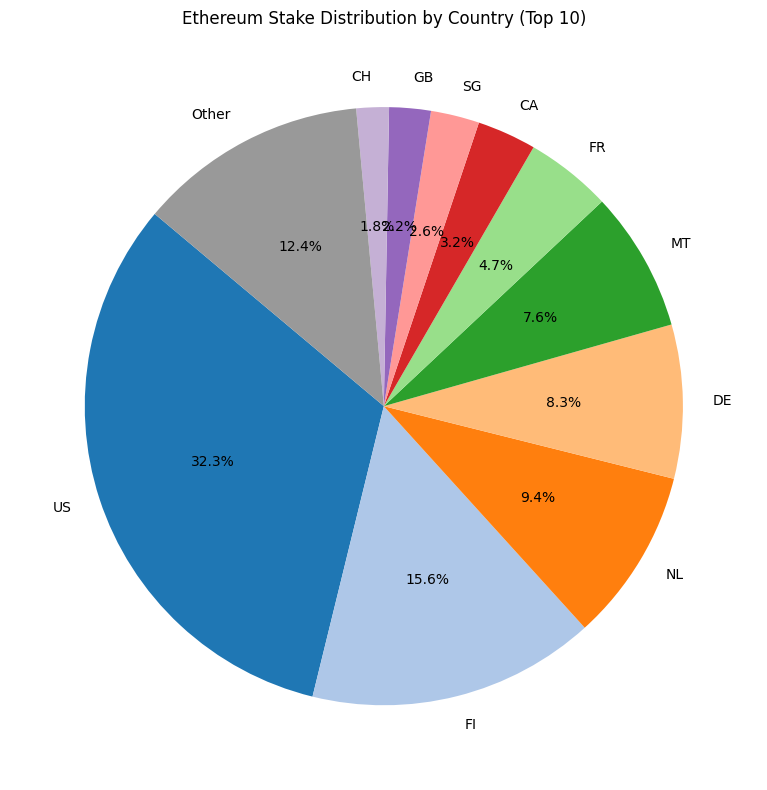

In [8]:
import matplotlib.pyplot as plt
from src.data_utils import pie_colors

# Check if the Ethereum geo/provider dataframe exists
if 'eth_geo_provider_df' in locals() and not eth_geo_provider_df.empty:
    # Group by country and sum the validators (each validator = 32 ETH)
    country_stake = eth_geo_provider_df.groupby('country')['validators'].sum()
    country_stake_eth = country_stake * 32  # Convert validators to ETH
    
    # Sort and take top 10 countries, group the rest as 'Other'
    country_stake_eth_sorted = country_stake_eth.sort_values(ascending=False)
    top_n = 10
    top_countries = country_stake_eth_sorted[:top_n]
    other = country_stake_eth_sorted[top_n:].sum()
    pie_data = top_countries.copy()
    if other > 0:
        pie_data['Other'] = other
    
    # Plot pie chart with DRY color logic
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Ethereum Stake Distribution by Country (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'eth_geo_provider_df' not found or is empty. Please run the data loading cell first.")

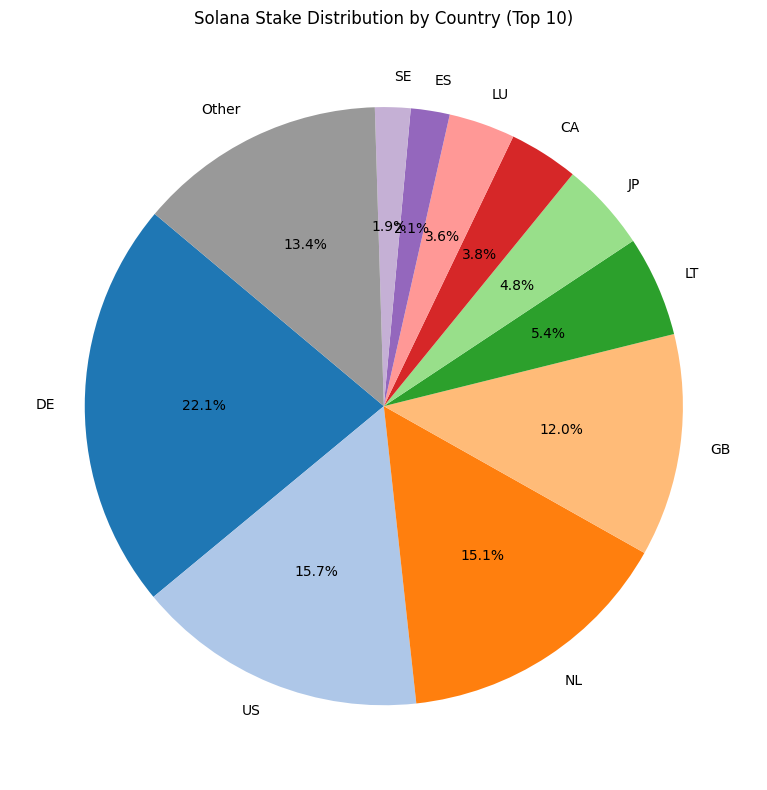

In [9]:
import matplotlib.pyplot as plt
from src.data_utils import pie_colors

# Check if the Solana validators dataframe exists
if 'solana_validators_df' in locals() and not solana_validators_df.empty:
    # Group by country and sum the active stake
    country_stake = solana_validators_df.groupby('country')['active_stake'].sum()
    # Sort and take top 10 countries, group the rest as 'Other'
    country_stake_sorted = country_stake.sort_values(ascending=False)
    top_n = 10
    top_countries = country_stake_sorted[:top_n]
    other = country_stake_sorted[top_n:].sum()
    pie_data = top_countries.copy()
    if other > 0:
        pie_data['Other'] = other
    
    # Plot pie chart with DRY color logic
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Solana Stake Distribution by Country (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'solana_validators_df' not found or is empty. Please run the data loading and enrichment cells first.")

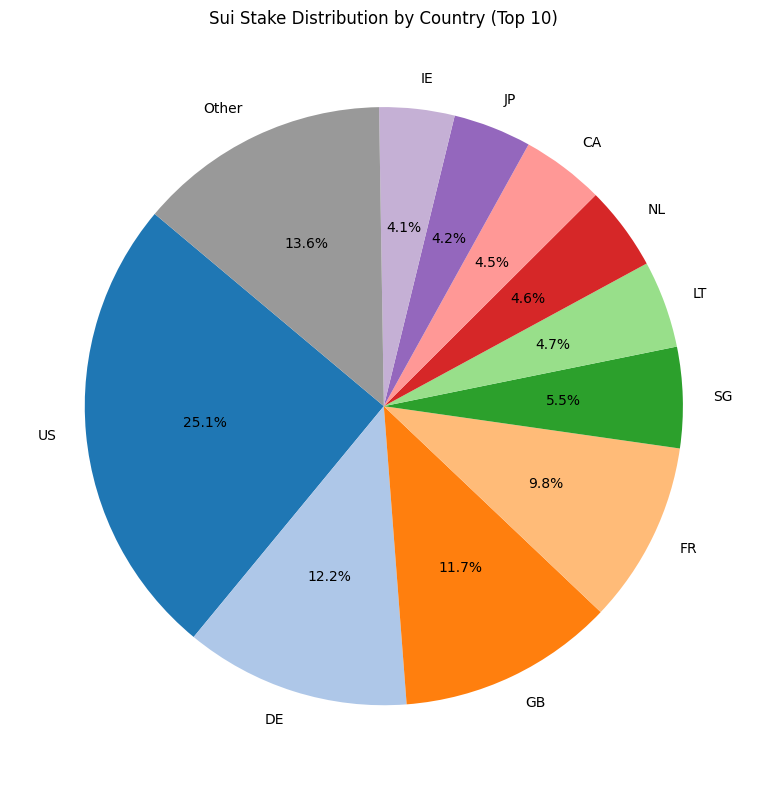

In [10]:
import matplotlib.pyplot as plt
from src.data_utils import pie_colors

# Check if the Sui validators dataframe exists
if 'sui_validators_df' in locals() and not sui_validators_df.empty:
    # Convert stakingPoolSuiBalance to numeric
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    # Group by country and sum the active stake
    country_stake = sui_validators_df.groupby('country')['stakingPoolSuiBalance'].sum()
    # Sort and take top 10 countries, group the rest as 'Other'
    country_stake_sorted = country_stake.sort_values(ascending=False)
    top_n = 10
    top_countries = country_stake_sorted[:top_n]
    other = country_stake_sorted[top_n:].sum()
    pie_data = top_countries.copy()
    if other > 0:
        pie_data['Other'] = other

    # Plot pie chart with DRY color logic
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Sui Stake Distribution by Country (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'sui_validators_df' not found or is empty. Please run the data loading and enrichment cells first.")

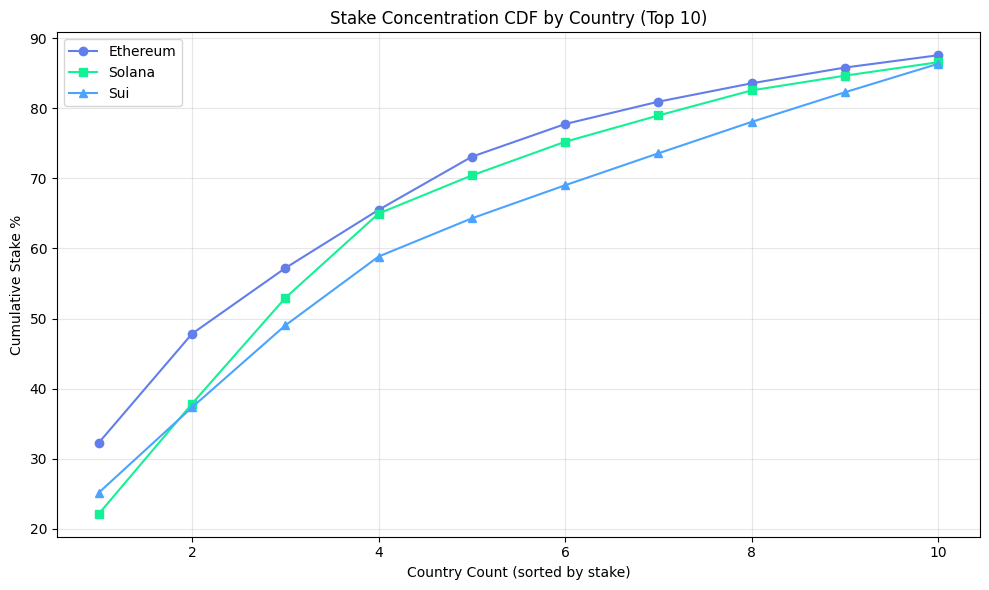

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from src.data_utils import chain_colors

plt.figure(figsize=(10, 6))
colors = chain_colors()

# Ethereum
if 'eth_geo_provider_df' in locals() and not eth_geo_provider_df.empty:
    country_stake = eth_geo_provider_df.groupby('country')['validators'].sum()
    country_stake_eth = country_stake * 32
    country_stake_eth_sorted = country_stake_eth.sort_values(ascending=False)
    stake_cumsum = country_stake_eth_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    country_indices = np.arange(1, len(stake_cdf) + 1)
    top_n = 10
    plt.plot(country_indices[:top_n], stake_cdf.iloc[:top_n], marker='o', label='Ethereum', color=colors['ethereum'])

# Solana
if 'solana_validators_df' in locals() and not solana_validators_df.empty:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    country_stake = solana_validators_df.groupby('country')['active_stake'].sum()
    country_stake_sorted = country_stake.sort_values(ascending=False)
    stake_cumsum = country_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    country_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(country_indices[:top_n], stake_cdf.iloc[:top_n], marker='s', label='Solana', color=colors['solana'])

# Sui
if 'sui_validators_df' in locals() and not sui_validators_df.empty:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    country_stake = sui_validators_df.groupby('country')['stakingPoolSuiBalance'].sum()
    country_stake_sorted = country_stake.sort_values(ascending=False)
    stake_cumsum = country_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    country_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(country_indices[:top_n], stake_cdf.iloc[:top_n], marker='^', label='Sui', color=colors['sui'])

plt.xlabel('Country Count (sorted by stake)')
plt.ylabel('Cumulative Stake %')
plt.title('Stake Concentration CDF by Country (Top 10)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

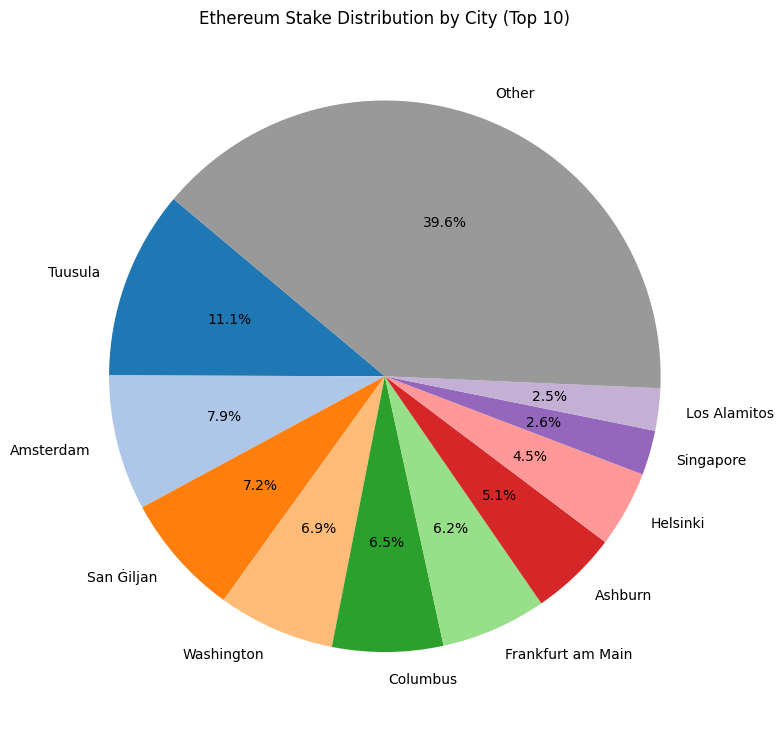

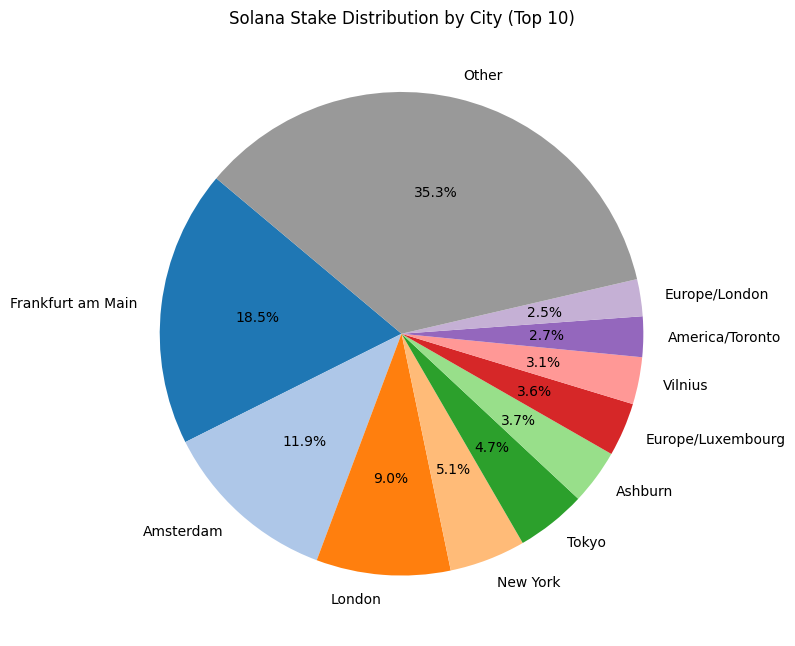

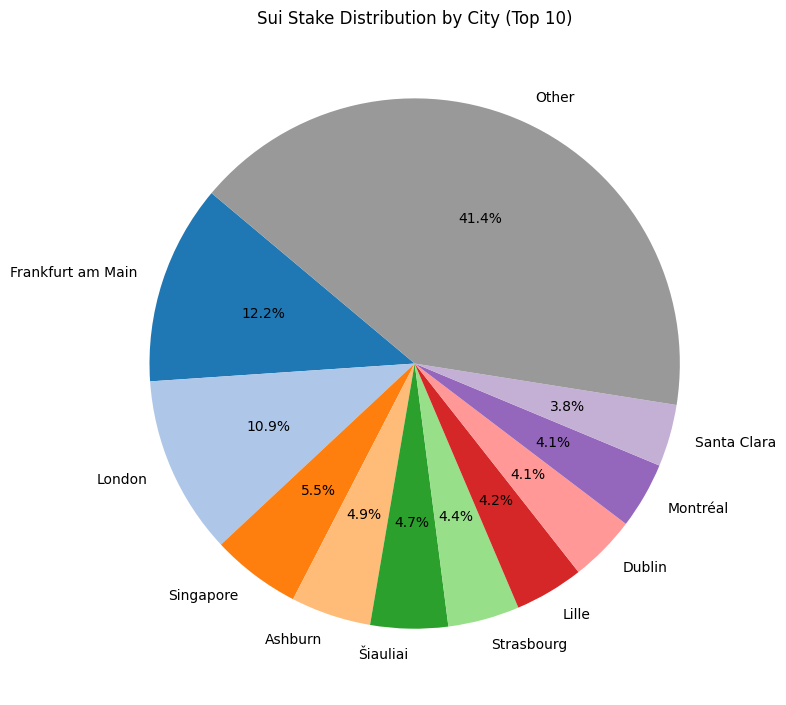

In [12]:
import matplotlib.pyplot as plt
from src.data_utils import pie_colors

# Ethereum Pie Chart by City
if 'eth_geo_provider_df' in locals() and not eth_geo_provider_df.empty and 'city' in eth_geo_provider_df.columns:
    city_stake = eth_geo_provider_df.groupby('city')['validators'].sum() * 32
    city_stake_sorted = city_stake.sort_values(ascending=False)
    top_n = 10
    top_cities = city_stake_sorted[:top_n]
    other = city_stake_sorted[top_n:].sum()
    pie_data = top_cities.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    colors = pie_colors(len(pie_data) - ('Other' in pie_data))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=colors)
    plt.title('Ethereum Stake Distribution by City (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'eth_geo_provider_df' not found or is empty, or 'city' column missing.")

# Solana Pie Chart by City
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'city' in solana_validators_df.columns:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    city_stake = solana_validators_df.groupby('city')['active_stake'].sum()
    city_stake_sorted = city_stake.sort_values(ascending=False)
    top_cities = city_stake_sorted[:top_n]
    other = city_stake_sorted[top_n:].sum()
    pie_data = top_cities.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    colors = pie_colors(len(pie_data) - ('Other' in pie_data))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=colors)
    plt.title('Solana Stake Distribution by City (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'solana_validators_df' not found or is empty, or 'city' column missing.")

# Sui Pie Chart by City
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'city' in sui_validators_df.columns:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    city_stake = sui_validators_df.groupby('city')['stakingPoolSuiBalance'].sum()
    city_stake_sorted = city_stake.sort_values(ascending=False)
    top_cities = city_stake_sorted[:top_n]
    other = city_stake_sorted[top_n:].sum()
    pie_data = top_cities.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    colors = pie_colors(len(pie_data) - ('Other' in pie_data))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=colors)
    plt.title('Sui Stake Distribution by City (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'sui_validators_df' not found or is empty, or 'city' column missing.")

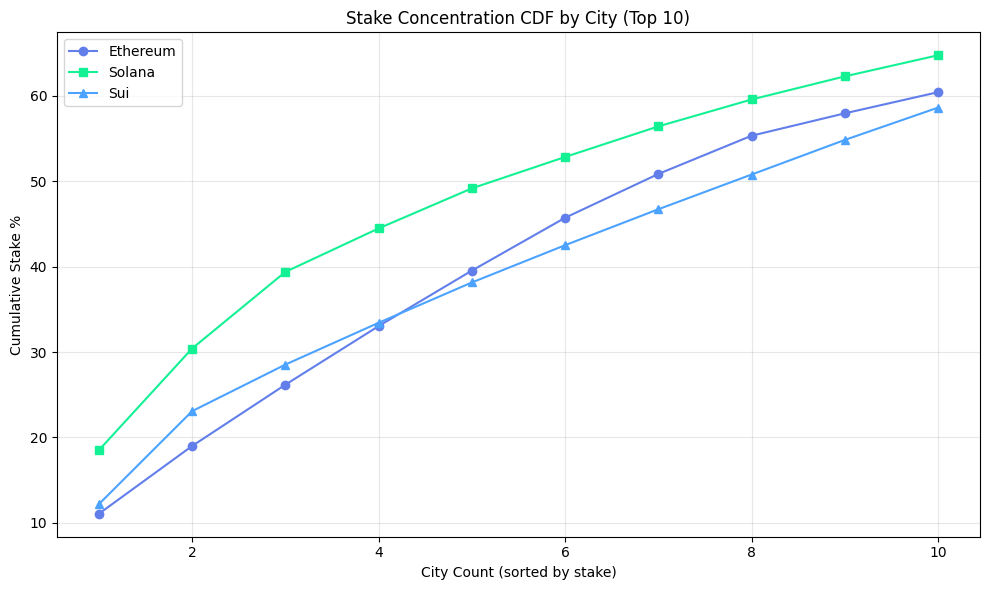

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from src.data_utils import chain_colors

top_n = 10
plt.figure(figsize=(10, 6))
colors = chain_colors()

# Ethereum CDF by City
if 'eth_geo_provider_df' in locals() and not eth_geo_provider_df.empty and 'city' in eth_geo_provider_df.columns:
    city_stake = eth_geo_provider_df.groupby('city')['validators'].sum() * 32
    city_stake_sorted = city_stake.sort_values(ascending=False)
    stake_cumsum = city_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    city_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(city_indices[:top_n], stake_cdf.iloc[:top_n], marker='o', label='Ethereum', color=colors['ethereum'])

# Solana CDF by City
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'city' in solana_validators_df.columns:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    city_stake = solana_validators_df.groupby('city')['active_stake'].sum()
    city_stake_sorted = city_stake.sort_values(ascending=False)
    stake_cumsum = city_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    city_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(city_indices[:top_n], stake_cdf.iloc[:top_n], marker='s', label='Solana', color=colors['solana'])

# Sui CDF by City
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'city' in sui_validators_df.columns:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    city_stake = sui_validators_df.groupby('city')['stakingPoolSuiBalance'].sum()
    city_stake_sorted = city_stake.sort_values(ascending=False)
    stake_cumsum = city_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    city_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(city_indices[:top_n], stake_cdf.iloc[:top_n], marker='^', label='Sui', color=colors['sui'])

plt.xlabel('City Count (sorted by stake)')
plt.ylabel('Cumulative Stake %')
plt.title('Stake Concentration CDF by City (Top 10)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

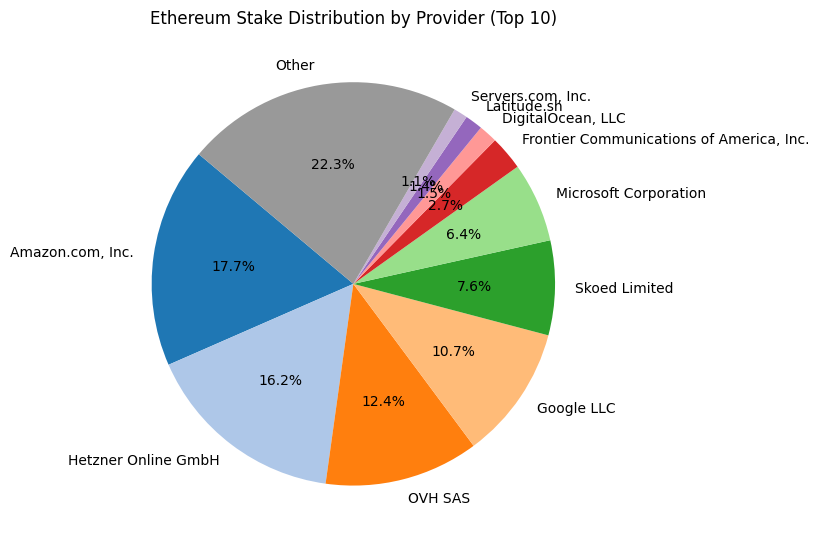

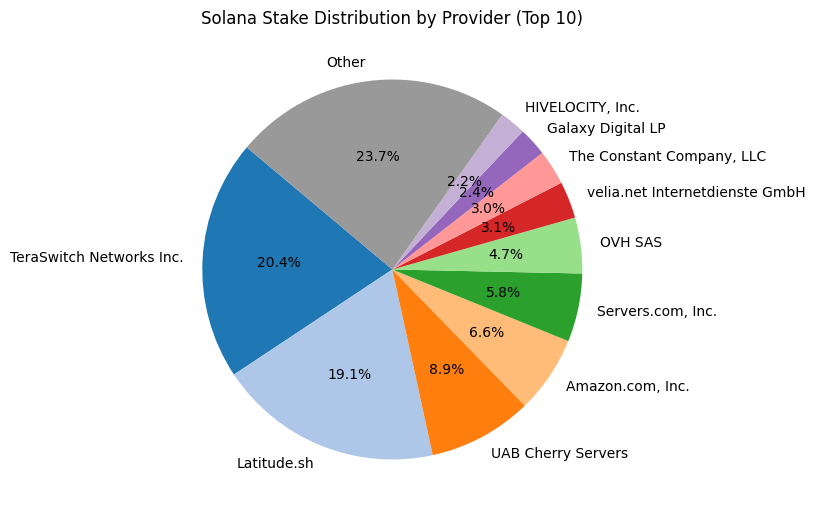

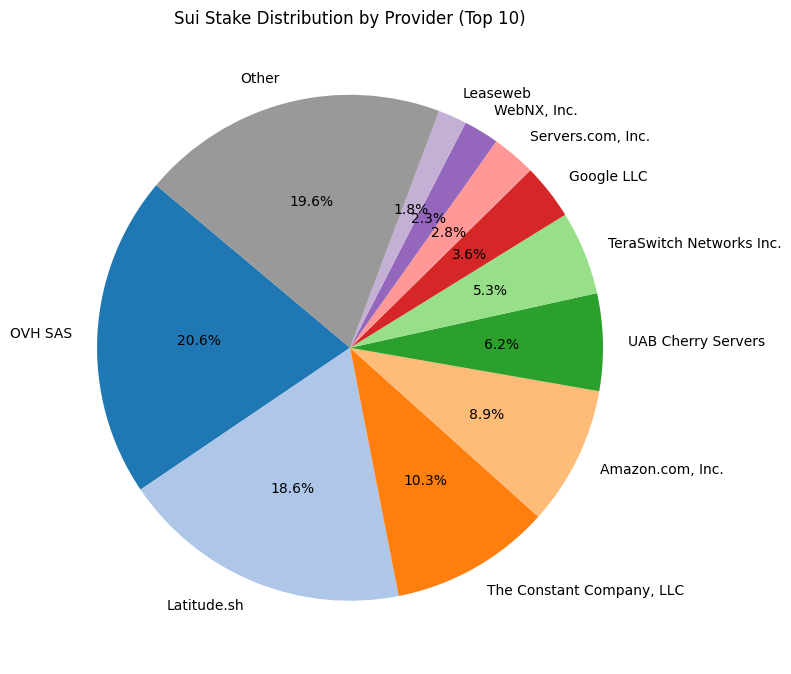

In [14]:
import matplotlib.pyplot as plt
from src.data_utils import pie_colors

top_n = 10

# Ethereum Pie Chart by Provider
if 'eth_geo_provider_df' in locals() and not eth_geo_provider_df.empty and 'asn_organization' in eth_geo_provider_df.columns:
    provider_stake = eth_geo_provider_df.groupby('asn_organization')['validators'].sum() * 32
    provider_stake_sorted = provider_stake.sort_values(ascending=False)
    top_providers = provider_stake_sorted[:top_n]
    other = provider_stake_sorted[top_n:].sum()
    pie_data = top_providers.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Ethereum Stake Distribution by Provider (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'eth_geo_provider_df' not found or is empty, or 'asn_organization' column missing.")

# Solana Pie Chart by Provider Name
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'provider_name' in solana_validators_df.columns:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    provider_stake = solana_validators_df.groupby('provider_name')['active_stake'].sum()
    provider_stake_sorted = provider_stake.sort_values(ascending=False)
    top_providers = provider_stake_sorted[:top_n]
    other = provider_stake_sorted[top_n:].sum()
    pie_data = top_providers.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Solana Stake Distribution by Provider (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'solana_validators_df' not found or is empty, or 'provider_name' column missing.")

# Sui Pie Chart by Provider Name
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'provider_name' in sui_validators_df.columns:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    provider_stake = sui_validators_df.groupby('provider_name')['stakingPoolSuiBalance'].sum()
    provider_stake_sorted = provider_stake.sort_values(ascending=False)
    top_providers = provider_stake_sorted[:top_n]
    other = provider_stake_sorted[top_n:].sum()
    pie_data = top_providers.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Sui Stake Distribution by Provider (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'sui_validators_df' not found or is empty, or 'provider_name' column missing.")

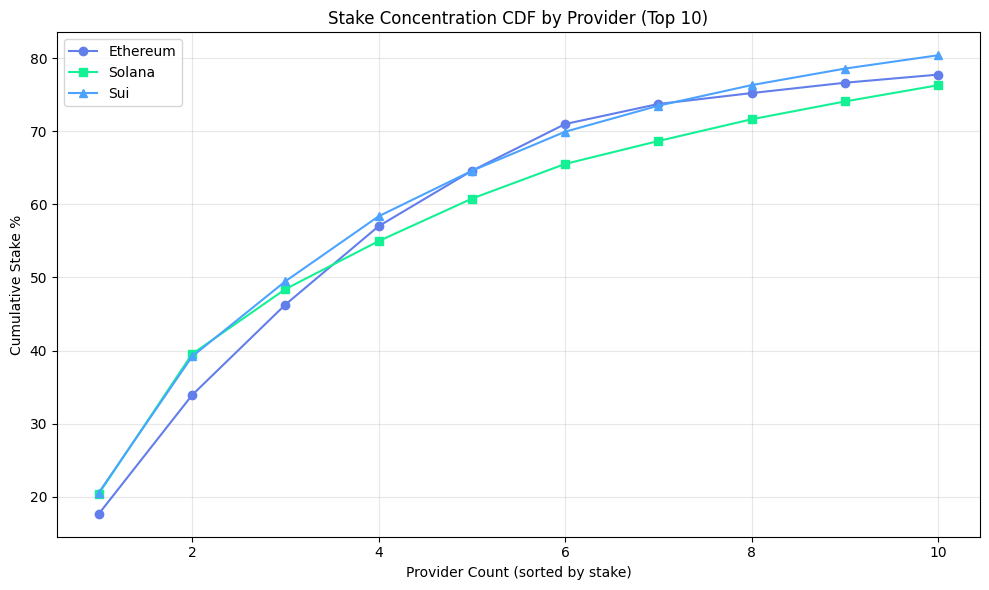

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from src.data_utils import chain_colors

plt.figure(figsize=(10, 6))
top_n = 10
colors = chain_colors()

# Ethereum CDF by Provider
if 'eth_geo_provider_df' in locals() and not eth_geo_provider_df.empty and 'asn_organization' in eth_geo_provider_df.columns:
    provider_stake = eth_geo_provider_df.groupby('asn_organization')['validators'].sum() * 32
    provider_stake_sorted = provider_stake.sort_values(ascending=False)
    stake_cumsum = provider_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    provider_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(provider_indices[:top_n], stake_cdf.iloc[:top_n], marker='o', label='Ethereum', color=colors['ethereum'])

# Solana CDF by Provider Name
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'provider_name' in solana_validators_df.columns:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    provider_stake = solana_validators_df.groupby('provider_name')['active_stake'].sum()
    provider_stake_sorted = provider_stake.sort_values(ascending=False)
    stake_cumsum = provider_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    provider_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(provider_indices[:top_n], stake_cdf.iloc[:top_n], marker='s', label='Solana', color=colors['solana'])

# Sui CDF by Provider Name
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'provider_name' in sui_validators_df.columns:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    provider_stake = sui_validators_df.groupby('provider_name')['stakingPoolSuiBalance'].sum()
    provider_stake_sorted = provider_stake.sort_values(ascending=False)
    stake_cumsum = provider_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    provider_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(provider_indices[:top_n], stake_cdf.iloc[:top_n], marker='^', label='Sui', color=colors['sui'])

plt.xlabel('Provider Count (sorted by stake)')
plt.ylabel('Cumulative Stake %')
plt.title('Stake Concentration CDF by Provider (Top 10)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

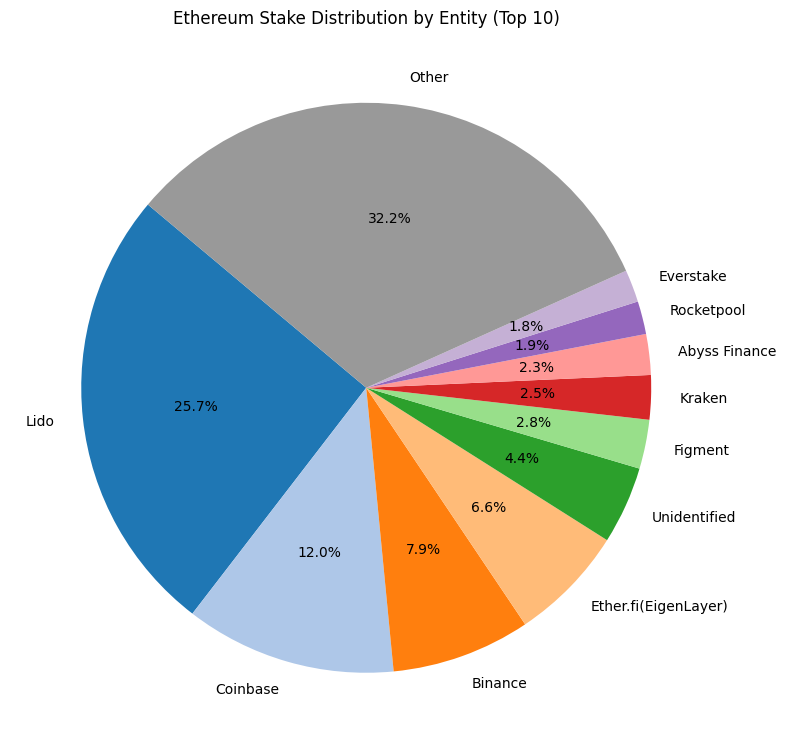

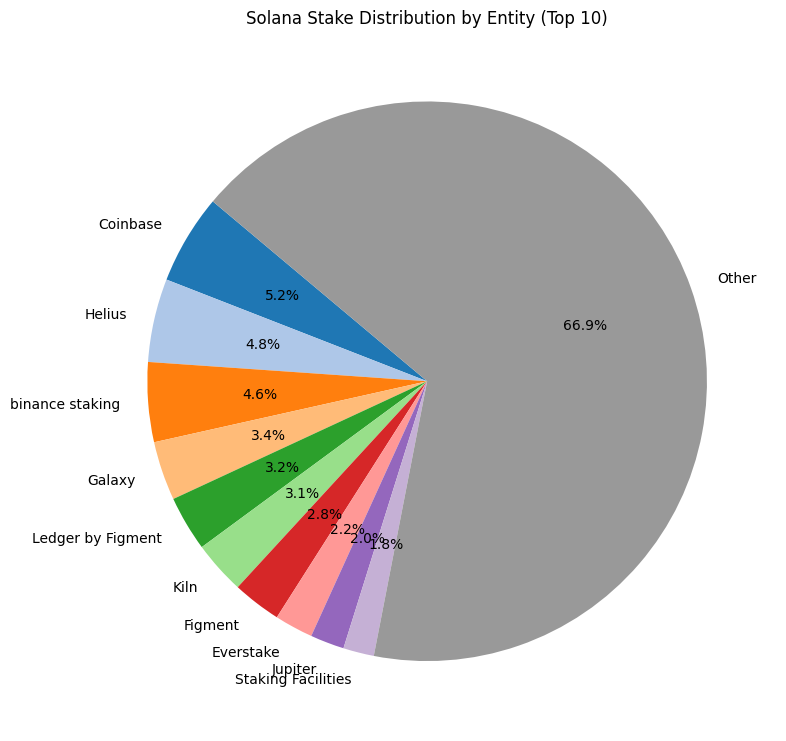

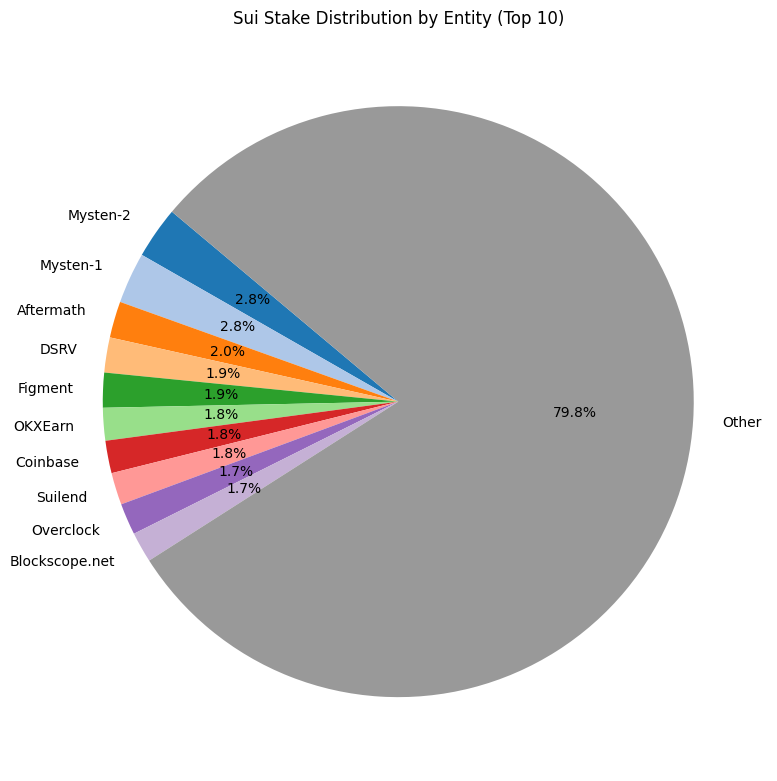

In [16]:
import matplotlib.pyplot as plt
from src.data_utils import pie_colors

top_n = 10

# Ethereum Pie Chart by Entity Name (from eth_entities_df)
if 'eth_entities_df' in locals() and not eth_entities_df.empty and 'name' in eth_entities_df.columns and 'eth_deposited' in eth_entities_df.columns:
    entity_stake = eth_entities_df.groupby('name')['eth_deposited'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    top_entities = entity_stake_sorted[:top_n]
    other = entity_stake_sorted[top_n:].sum()
    pie_data = top_entities.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Ethereum Stake Distribution by Entity (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'eth_entities_df' not found or is empty, or required columns missing.")

# Solana Pie Chart by Entity Name (use name field)
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'name' in solana_validators_df.columns:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    entity_stake = solana_validators_df.groupby('name')['active_stake'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    top_entities = entity_stake_sorted[:top_n]
    other = entity_stake_sorted[top_n:].sum()
    pie_data = top_entities.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Solana Stake Distribution by Entity (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'solana_validators_df' not found or is empty, or 'name' column missing.")

# Sui Pie Chart by Entity Name (use name field)
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'name' in sui_validators_df.columns:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    entity_stake = sui_validators_df.groupby('name')['stakingPoolSuiBalance'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    top_entities = entity_stake_sorted[:top_n]
    other = entity_stake_sorted[top_n:].sum()
    pie_data = top_entities.copy()
    if other > 0:
        pie_data['Other'] = other
    plt.figure(figsize=(8, 8))
    pie_data.plot.pie(autopct='%1.1f%%', startangle=140, label='', colors=pie_colors(n_main=10))
    plt.title('Sui Stake Distribution by Entity (Top 10)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'sui_validators_df' not found or is empty, or 'name' column missing.")

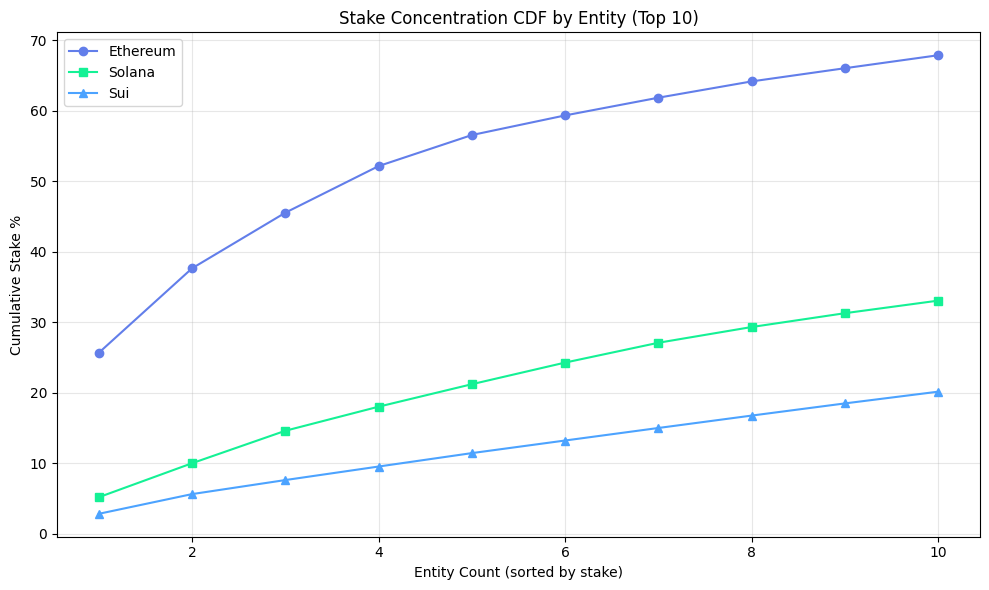

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from src.data_utils import chain_colors

plt.figure(figsize=(10, 6))
top_n = 10
colors = chain_colors()

# Ethereum CDF by Entity Name (from eth_entities_df)
if 'eth_entities_df' in locals() and not eth_entities_df.empty and 'name' in eth_entities_df.columns and 'eth_deposited' in eth_entities_df.columns:
    entity_stake = eth_entities_df.groupby('name')['eth_deposited'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    stake_cumsum = entity_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    entity_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(entity_indices[:top_n], stake_cdf.iloc[:top_n], marker='o', label='Ethereum', color=colors['ethereum'])

# Solana CDF by Entity Name (use name field)
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'name' in solana_validators_df.columns:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    entity_stake = solana_validators_df.groupby('name')['active_stake'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    stake_cumsum = entity_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    entity_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(entity_indices[:top_n], stake_cdf.iloc[:top_n], marker='s', label='Solana', color=colors['solana'])

# Sui CDF by Entity Name (use name field)
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'name' in sui_validators_df.columns:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    entity_stake = sui_validators_df.groupby('name')['stakingPoolSuiBalance'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    stake_cumsum = entity_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    entity_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(entity_indices[:top_n], stake_cdf.iloc[:top_n], marker='^', label='Sui', color=colors['sui'])

plt.xlabel('Entity Count (sorted by stake)')
plt.ylabel('Cumulative Stake %')
plt.title('Stake Concentration CDF by Entity (Top 10)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

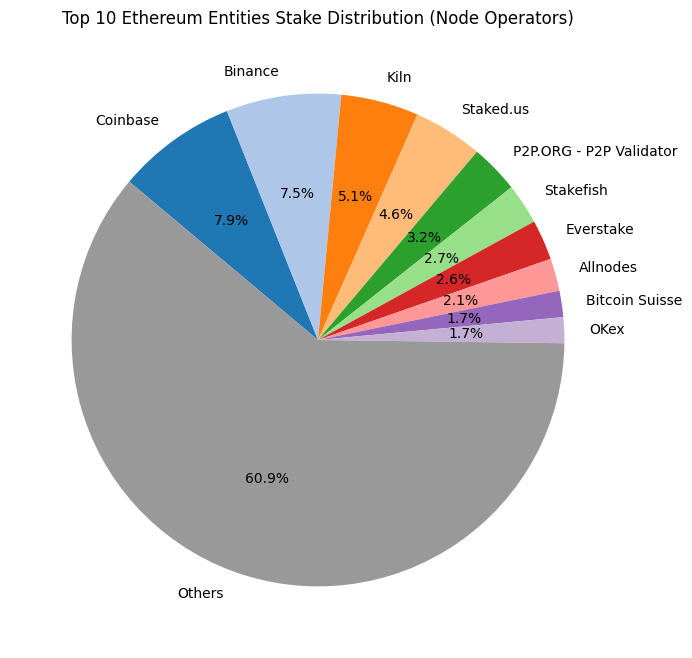

In [18]:
# --- Pie Chart: Top 10 Ethereum Entities Stake Distribution (Curated) ---
import pandas as pd
import matplotlib.pyplot as plt
from src.data_utils import pie_colors

# Load the curated CSV
# Data curated from Rated
curated_path = '../data/top_entities_ethereum_curated.csv'
curated_df = pd.read_csv(curated_path)

# Sort and select top 10 entities
curated_df = curated_df.sort_values('Network Penetration (%)', ascending=False)
top10 = curated_df.head(10)

# Calculate 'Others' slice
top10_sum = top10['Network Penetration (%)'].sum()
others = 100 - top10_sum

# Prepare data for pie chart
labels = top10['Entity Name'].tolist() + ['Others']
sizes = top10['Network Penetration (%)'].tolist() + [others]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
colors = pie_colors(len(labels) - 1)  # -1 because 'Others' will use the neutral gray
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, counterclock=False, colors=colors)
ax.set_title('Top 10 Ethereum Entities Stake Distribution (Node Operators)')
plt.show()

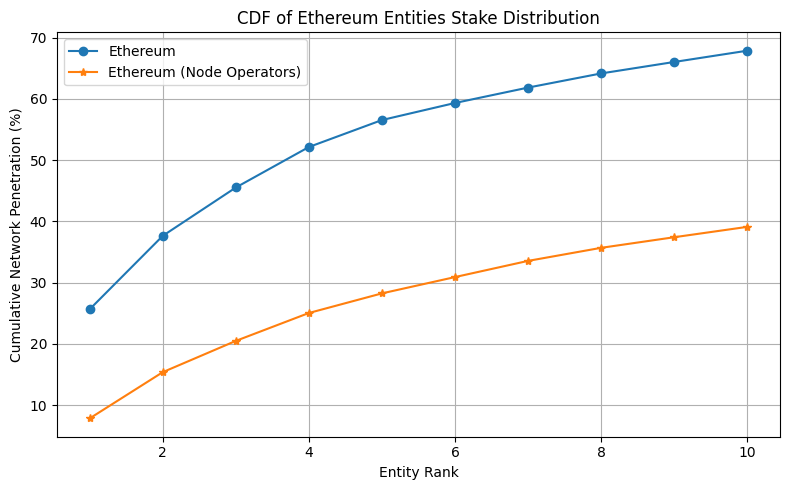

In [19]:
# --- CDF: Ethereum Entities Stake Distribution (Curated) ---
import pandas as pd
import matplotlib.pyplot as plt

top_n = 10
plt.figure(figsize=(8, 5))

# Ethereum CDF by Entity Name (from eth_entities_df)
if 'eth_entities_df' in locals() and not eth_entities_df.empty and 'name' in eth_entities_df.columns and 'eth_deposited' in eth_entities_df.columns:
    entity_stake = eth_entities_df.groupby('name')['eth_deposited'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    stake_cumsum = entity_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    entity_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(entity_indices[:top_n], stake_cdf.iloc[:top_n], marker='o', label='Ethereum')

# Load the curated CSV
curated_path = '../data/top_entities_ethereum_curated.csv'
curated_df = pd.read_csv(curated_path)

# Sort by descending penetration
curated_df = curated_df.sort_values('Network Penetration (%)', ascending=False).reset_index(drop=True)

# Compute cumulative sum and CDF
curated_df['Cumulative %'] = curated_df['Network Penetration (%)'].cumsum()
curated_df['Entity Rank'] = curated_df.index + 1

# Plot
plt.plot(curated_df['Entity Rank'][:10], curated_df['Cumulative %'][:10], marker='*', label='Ethereum (Node Operators)')
plt.xlabel('Entity Rank')
plt.ylabel('Cumulative Network Penetration (%)')
plt.title('CDF of Ethereum Entities Stake Distribution')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

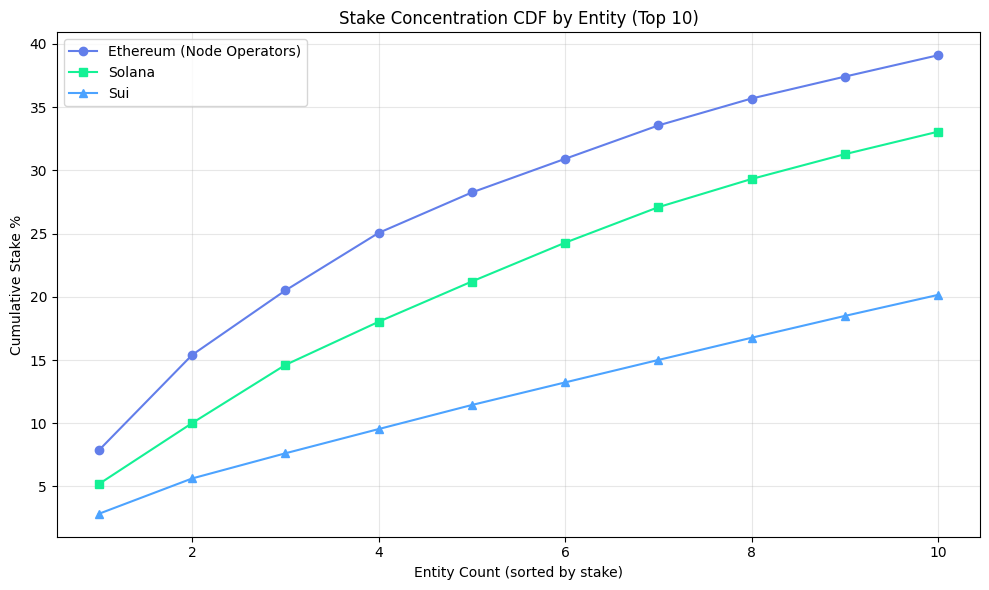

In [20]:
# --- Stake Concentration CDF by Entity (Top 10, Curated for Ethereum) ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from src.data_utils import chain_colors

top_n = 10
plt.figure(figsize=(10, 6))
colors = chain_colors()

# Ethereum (Curated)
curated_path = '../data/top_entities_ethereum_curated.csv'
curated_df = pd.read_csv(curated_path)
entity_stake = curated_df.set_index('Entity Name')['Network Penetration (%)']
entity_stake_sorted = entity_stake.sort_values(ascending=False)
stake_cumsum = entity_stake_sorted.cumsum()
stake_cdf = stake_cumsum / 100 * 100  # Already in percent, so just cumsum
entity_indices = np.arange(1, len(stake_cdf) + 1)
plt.plot(entity_indices[:top_n], stake_cdf.iloc[:top_n], marker='o', label='Ethereum (Node Operators)', color=colors['ethereum'])

# Solana
if 'solana_validators_df' in locals() and not solana_validators_df.empty and 'name' in solana_validators_df.columns:
    solana_validators_df['active_stake'] = pd.to_numeric(solana_validators_df['active_stake'], errors='coerce')
    entity_stake = solana_validators_df.groupby('name')['active_stake'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    stake_cumsum = entity_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    entity_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(entity_indices[:top_n], stake_cdf.iloc[:top_n], marker='s', label='Solana', color=colors['solana'])

# Sui
if 'sui_validators_df' in locals() and not sui_validators_df.empty and 'name' in sui_validators_df.columns:
    sui_validators_df['stakingPoolSuiBalance'] = pd.to_numeric(sui_validators_df['stakingPoolSuiBalance'], errors='coerce')
    entity_stake = sui_validators_df.groupby('name')['stakingPoolSuiBalance'].sum()
    entity_stake_sorted = entity_stake.sort_values(ascending=False)
    stake_cumsum = entity_stake_sorted.cumsum()
    stake_cdf = stake_cumsum / stake_cumsum.iloc[-1] * 100
    entity_indices = np.arange(1, len(stake_cdf) + 1)
    plt.plot(entity_indices[:top_n], stake_cdf.iloc[:top_n], marker='^', label='Sui', color=colors['sui'])

plt.xlabel('Entity Count (sorted by stake)')
plt.ylabel('Cumulative Stake %')
plt.title('Stake Concentration CDF by Entity (Top 10)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()